In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 로지스틱 회귀

- 시그모이드 함수 => 이진분류 
- 소프트맥스 함수 => 다중분류

### 시그모이드(sigmoid) 함수의 특징 
```
z 입력에 무엇이 들어가든 함수값이 (0,1)로 제한된다. 
중간 값은 0.5 이다.
매우 큰 값을 가지면 거의 1이며, 매우 작은 값을 가지면 거의 0이다.  
Binary classification에 적절한 함수이다. 
```

z = (회귀계수1*피처값1) + (회귀계수2*피처값2) + .... + 절편

- z를 확률로 변경하여 주는 함수가 시그모이드 함수

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/faaa0c014ae28ac67db5c49b3f3e8b08415a3f2b">

- z가 0이면 0.5. z가 어떤값이 되더라도 0~1사이의 범위가 된다. 

- 0.5를 기준으로 작으면 0 음성클래스, 크면 1 양성클래스 

- 시그모이드 그래프 
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDA3MDdfMTgx/MDAxNTk0MTMwODg2NzAw.Bgt42rm3pV0xTPfuVjN1UbXw9HchDcAdLdvnsrAQvJ0g.ILAv2yJkoMXNiWHKAUe0QswJWyr84GwwlRbXwxCogKUg.PNG.zzoyou_/sigmoid.png?type=w800" width="50%">

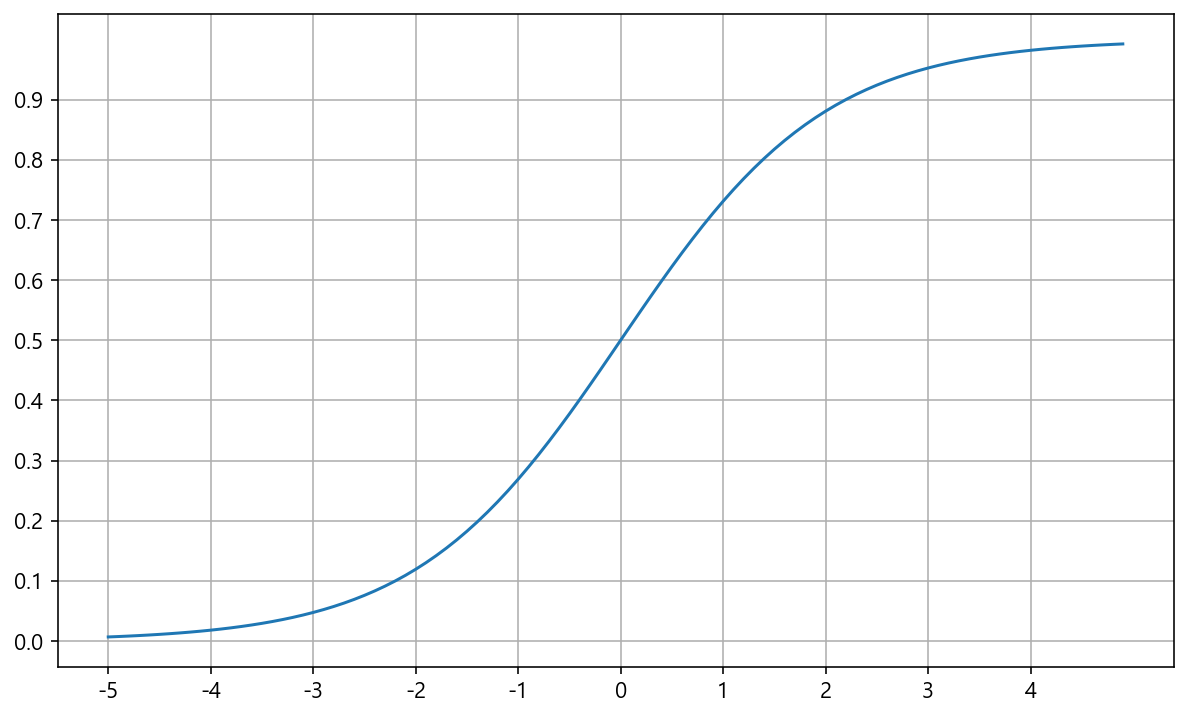

In [197]:
x = np.arange(-5, 5, 0.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.yticks(np.arange(0, 1, step=0.1))
plt.xticks(np.arange(-5, 5))
plt.grid()
plt.show()

### 데이터 준비하기

In [236]:
# ls data\*.csv

In [237]:
wine_df = pd.read_csv('data/redwine.csv')
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [241]:
wine_df['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [243]:
X = wine_df[['alcohol','sugar','pH']]
y = wine_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [255]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [256]:
model_lr.predict(X_train_scaled[:5])

array([0., 1., 0., 1., 1.])

In [257]:
model_lr.predict_proba(X_train_scaled[:5])

array([[0.68563597, 0.31436403],
       [0.26637211, 0.73362789],
       [0.56821508, 0.43178492],
       [0.03960494, 0.96039506],
       [0.16518247, 0.83481753]])

In [258]:
model_lr.coef_, model_lr.intercept_

(array([[ 0.53273869,  1.67940585, -0.7090217 ]]), array([1.84713933]))

In [259]:
np.sum(model_lr.coef_*X_train_scaled[0]) + model_lr.intercept_

array([-0.77979519])

In [260]:
decisions = model_lr.decision_function([X_train_scaled[0]])
decisions

array([-0.77979519])

In [261]:
model_lr.predict_proba([X_train_scaled[0]])

array([[0.68563597, 0.31436403]])

In [263]:
y_train[0]

0.0

In [264]:
x = model_lr.decision_function([X_train_scaled[0]])
1 / (1 + np.exp(-x))

array([0.31436403])

In [267]:
model_lr.predict_proba([X_train_scaled[0]])[0,1]

0.3143640295115924

In [265]:
model_lr.predict([X_train_scaled[0]])

array([0.])

## 로지스틱 회귀로 다중 분류 수행하기

#### 소프트맥스 함수
- 0~1 사이의 확률값 (단, 결과 총합이 1이 된다)
- multinomial classification
- 라벨 분류값이 하나일 때 사용되는 시그모이드 함수를 라벨 분류값이 여러개일 때도 사용할 수 있도록 일반화 한 것이다

<img src='https://ichi.pro/assets/images/max/724/1*jf_Qr_etCPtIKq7NYa6F_w.png' width="50%">

### 데이터 준비하기

In [9]:
from sklearn.datasets import load_wine

In [10]:
wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [11]:
wine_df2 = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df2['target'] = wine_data.target
wine_df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
wine_df2['target'].unique()

array([0, 1, 2])

In [13]:
wine_df2['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [14]:
wine_df2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [15]:
X = wine_df2.loc[:, :'proline']
y = wine_df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [16]:
model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train_scaled, y_train)

print(model_kn.score(X_train_scaled, y_train))
print(model_kn.score(X_test_scaled, y_test))

0.9774436090225563
0.9555555555555556


In [17]:
model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train_scaled, y_train)

print(model_dt.score(X_train_scaled, y_train))
print(model_dt.score(X_test_scaled, y_test))

1.0
0.9555555555555556


In [18]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

0.9924812030075187
1.0


In [19]:
print(classification_report(y_test, model_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [20]:
model_lr.predict_proba([X_test_scaled[0]])

array([[0.76804457, 0.21304495, 0.01891048]])

In [21]:
y_test.to_numpy()[0]

0

In [22]:
model_lr.classes_

array([0, 1, 2])

In [23]:
model_lr.coef_.shape, model_lr.intercept_.shape

((3, 13), (3,))

In [24]:
model_lr.coef_

array([[ 0.40517953,  0.03727994,  0.21319388, -0.39877465,  0.0623688 ,
         0.21671622,  0.37726351, -0.11884924,  0.06219045,  0.09513502,
         0.09829367,  0.31800137,  0.51189239],
       [-0.49616871, -0.27431288, -0.35949821,  0.2466096 , -0.08938557,
         0.00713682,  0.06386366,  0.02938358,  0.17592569, -0.5094379 ,
         0.30631904,  0.05915978, -0.47227749],
       [ 0.09098918,  0.23703294,  0.14630432,  0.15216505,  0.02701677,
        -0.22385304, -0.44112717,  0.08946566, -0.23811614,  0.41430288,
        -0.40461271, -0.37716115, -0.0396149 ]])

In [25]:
print(model_lr.coef_[0], X_test_scaled[0], model_lr.intercept_[0])
print()
print(model_lr.coef_[1], X_test_scaled[0], model_lr.intercept_[1])
print()
print(model_lr.coef_[2], X_test_scaled[0], model_lr.intercept_[2])

[ 0.40517953  0.03727994  0.21319388 -0.39877465  0.0623688   0.21671622
  0.37726351 -0.11884924  0.06219045  0.09513502  0.09829367  0.31800137
  0.51189239] [ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
  1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
  0.56819862] 0.07655073681136179

[-0.49616871 -0.27431288 -0.35949821  0.2466096  -0.08938557  0.00713682
  0.06386366  0.02938358  0.17592569 -0.5094379   0.30631904  0.05915978
 -0.47227749] [ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
  1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
  0.56819862] 0.531097829809003

[ 0.09098918  0.23703294  0.14630432  0.15216505  0.02701677 -0.22385304
 -0.44112717  0.08946566 -0.23811614  0.41430288 -0.40461271 -0.37716115
 -0.0396149 ] [ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
  1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
  0.56819862] 

In [26]:
model_lr.predict(X_test_scaled)[0], y_test.to_numpy()[0]

(0, 0)

In [27]:
for i in range(3) :
    print(np.sum(model_lr.coef_[i]*X_test_scaled[0])+model_lr.intercept_[i])

1.6621586462810358
0.3798140382201524
-2.0419726845011876


In [28]:
decision = model_lr.decision_function([X_test_scaled[0]])
np.round(decision, decimals=2)

array([[ 1.66,  0.38, -2.04]])

In [30]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
np.round(proba, decimals=3)

array([[0.768, 0.213, 0.019]])

In [32]:
model_lr.predict_proba([X_test_scaled[0]])

array([[0.76804457, 0.21304495, 0.01891048]])

# 퀴즈 

1) 아래의 주소를 이용하여 데이타셋을 생성하여라 

'https://bit.ly/fish_csv'

2) 물고기의 종류는 다음과 같다. 

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

도미(Bream) 와 빙어(Smelt) 만 추출하여 새로운 데이타셋 bream_smelt 을 생성하고 
이진분류 모델을 구축하고 테스트하여라 

3) 1의 데이타셋을 이용하여 다중 분류 모델을 구축하고 테스트하여라.
